In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
import string
from nltk.corpus import stopwords

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
message_lst = [line.rstrip() for line in open('SMSSpamCollection')]

In [12]:
print len(message_lst)


5574


In [10]:
for message_num,message_details in enumerate(message_lst[:10]):
    print message_num,message_details
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [17]:
message_df = pd.read_csv('SMSSpamCollection',sep='\t',names = ['label','message'])
message_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
message_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
message_df.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [20]:
message_df['message_length'] = message_df['message'].apply(len)

In [21]:
message_df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


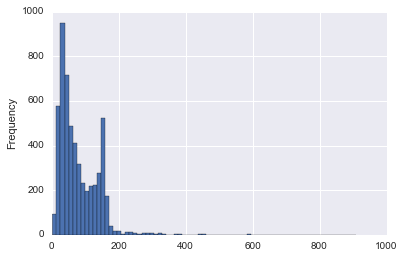

In [23]:
message_df['message_length'].plot(bins=75,kind='hist')

In [24]:
message_df['message_length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64

In [54]:
message_df[message_df['message_length'] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B48F2B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9DE278>], dtype=object)

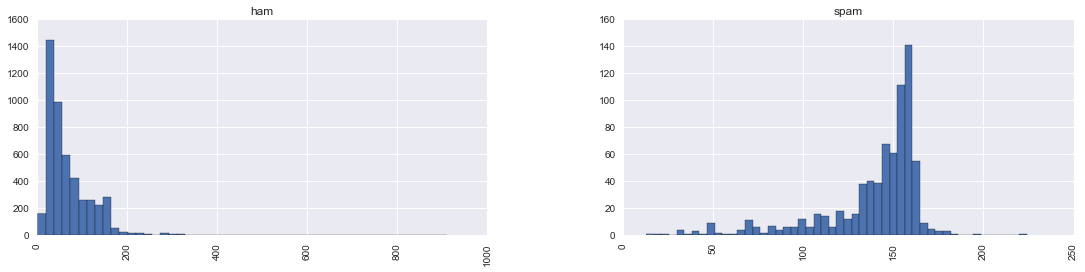

In [57]:
message_df.hist(column = 'message_length',by='label', bins =50, figsize=(18,4))

In [65]:
stopwords.words('english')[:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [68]:
def text_processing(message):
    no_punctuation = [char for char in message if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [69]:
message_df['message'].apply(text_processing)

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [72]:
bow_transformer = CountVectorizer(analyzer = text_processing).fit(message_df['message'])

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [73]:
print len(bow_transformer.vocabulary_)

11425


In [80]:
message4 = message_df['message'][3]
print message4

U dun say so early hor... U c already then say...


In [76]:
bow4 = bow_transformer.transform([message4])

In [79]:
print bow4
print '\n'
print bow4.shape

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


(1, 11425)


In [81]:
print bow_transformer.get_feature_names()[4068]

U


In [83]:
message_df_bow = bow_transformer.transform(message_df['message'])

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [85]:
print 'Shape of sparse matrix:: ', message_df_bow.shape
print '\n'
print 'Amount of non-zero occurences:: ',message_df_bow.nnz
print '\n'
print 'Sparsity:: %0.2f%%' %(100.0 * message_df_bow.nnz/(message_df_bow.shape[0]*message_df_bow.shape[1]))

Shape of sparse matrix::  (5572, 11425)


Amount of non-zero occurences::  50548


Sparsity:: 0.08%


In [89]:
tfidf_transformer = TfidfTransformer().fit(message_df_bow)

In [90]:
tfidf4 = tfidf_transformer.transform(bow4)
print tfidf4

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [91]:
print tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

3.28005242674


In [92]:
message_df_tfidf = tfidf_transformer.transform(message_df_bow)

In [93]:
print message_df_tfidf.shape

(5572, 11425)


In [102]:
spam_detection_model = MultinomialNB().fit(message_df_tfidf,message_df['label'])

In [103]:
print 'Prediction:: ', spam_detection_model.predict(tfidf4)[0]
print 'expected:: ',message_df['label'][3]

Prediction::  ham
expected::  ham


In [104]:
total_prediction = spam_detection_model.predict(message_df_tfidf)

In [106]:
print classification_report(message_df['label'],total_prediction)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [107]:
X_train,X_test,y_train,y_test = train_test_split(message_df['message'],message_df['label'],test_size=0.3)

In [109]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_processing)),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [110]:
pipeline.fit(X_train,y_train)

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x00000000035E3D68>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepro...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [111]:
prediction = pipeline.predict(X_test)

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [114]:
print classification_report(prediction,y_test)

             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1528
       spam       0.65      1.00      0.79       144

avg / total       0.97      0.95      0.96      1672



In [115]:
print classification_report(y_test,prediction)

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1452
       spam       1.00      0.65      0.79       220

avg / total       0.96      0.95      0.95      1672

